# Workshop 4, advanced AI.

**Mariana Castro Payns - A01706038**

## 2. Introduction

Without the idea of summarizing data with descriptive statistics, we cannot conceive the histogram. Without the idea of the histogram we cannot conceive the CLT, and without the CLT we cannot make inferences for hypothesis testing.

We can apply hypothesis testing to test claims about random variables. These random variables can be one mean, difference of 2 means, correlation, and also coefficients of the linear regression model. 

The simple regression model also measures the linear relationship between 2 random variables (X and Y), but the difference is that X is supposed to explain the movements Y, so Y depends on the movement of X, the independent variable.

The regression model estimates a linear equation (regression line) to represent how much Y (on average) moves with movements of X, and what is the expected value of Y when X=0.

## 3. The Simple Linear Regression.

### 3.1 Introduction.

The simple linear regression model is used to understand the linear relationship between two variables assuming that one variable, the independent variable (IV), can be used as a predictor of the other variable, the dependent variable (DV).

The simple regression model considers only one independent variable, while the multiple regression model can include more than one independent variables. But both models only consider one dependent variable. Then, we can use regression models for:

1. Understanding the relationship between a dependent variable and a one or more independent variables - also called explanatory variables

2. Predicting or estimating the expected value of the dependent variable according to specific value of the independent variables

### 3.3 Types of data structures. 

The market model is a time-series regression model. In this model we looked at the relationship between 2 variables representing one feature or attribute (returns) of two “subjects” over time: a stock and a market index. The market model is an example of a regression model, but the data structure or type of data used is time-series data. These type of regression models are called pulled time-series regression.

There are basically three types of data used in regression models:

1. Time-series: each observation represents one period, and each column represents one or more variables, which are characteristics of one or more subjects. Then, we have one or more variables measured in several time periods.

2. Cross-sectional: each observation represents one subject in only one time period, and each column represents variables or characteristics of the subjects.

3. Panel data: this is a combination of time-series with cross-sectional structure.

### 3.5 The OLS method.

The Ordinary Least Square is an optimization method to estimate the best values of the beta coefficients and their standard errors in a linear regression model.

If Y is the dependent variable and X the independent variable, the regression equation is as follows:



The regression line is given by the expected value of Y (also called Ŷi):



The purpose of OLS is to find the best regression line that best represents all the points.

To find the best regression line (beta0 and beta1), the OLS method tries to minimize the sum of squared errors of the regression equation.

For a data set of 4 observations:


If we do a scatter plot and a line that fits the points:

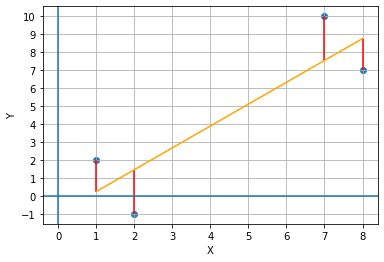

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

The error of each point is the red vertical line, which is the distance between the point and the prediction of the regression line. This distance is given by the difference between the specific value and its predicted value:

The purpose of OLS is to find the values of beta0 and beta1 such that the sum of the squared of all errors is minimized. 

We can do a 3D plot for this function to have a better idea. It is a 3D plot since the function depends on 2 values beta0 y beta1:

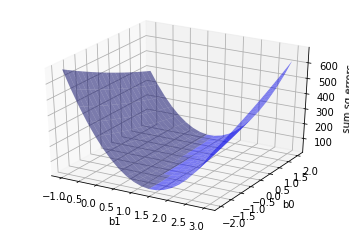

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import numpy as np
# I define a function to get the sum of squared errors given a specific b0 and b1 coefficients:
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)
# Note that df is a dataframe, so this line of code performs a row-wise operation to avoid 
#   writing a loop to sum each squared error for each observation

# Create the plot:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
# I create 20 possible values of beta0 and beta1:
# beta1 will move between -1 and 3
b1s = np.linspace(-1, 3.0, 20)
# beta0 will move between -2 and 2:
b0s = np.linspace(-2, 2, 20)
# I create a grid with all possible combinations of beta0 and beta1 using the meshgrid function:
# M will be all the b1s values, and B the beta0 values:
M, B = np.meshgrid(b1s, b0s)
# I calculate the sum of squared errors with all possible pairs of beta0 and beta1 of the previous grid:
zs = np.array([sumsqerrors2(mp, bp, df) 
        for mp, bp in zip(np.ravel(M), np.ravel(B))])
# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

plt.show()

We see that this function is single-curved. The sum of squared errors changes with different paired values (beta0,beta1). The lowest point of this surface will be the optimal values of (beta0,beta1) where the sum of squared error is the minimum of all. 

### 3.5 CHALLENGE: Run and interpret a market regression model. 

Now it’s time to use real data to better understand this model. Download monthly prices for Alfa (ALFAA.MX) and the Mexican market index IPCyC (^MXX) from Yahoo Finance from January 2018 to July 2022.

In [10]:
!pip install --upgrade pandas
!pip install pandas-datareader
!pip install --upgrade pandas-datareader

  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d5/50/54451e88e3da4616286029a3a17fc377de817f66a0f50e1faaee90161724/pytz-2022.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/52/accb990baebe0063977f26e02df36aa7eb4015ed4e86f828cd76273cd6f1/pandas_datareader-0.8.1-py2.py3-none-any.whl
  Using cached htt

1. Calculate cc returns of both stocks and drop NA values. 

In [11]:
# Calculate cc returns of both stocks and drop NaN values
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

2. Do a scatter plot including the regression line

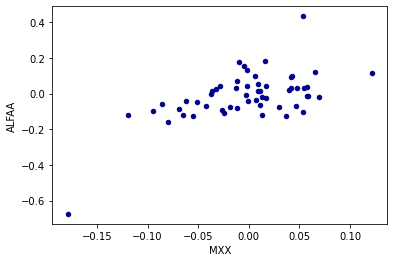

In [12]:
# Scatter plot including regression line
sr.plot.scatter(x='MXX', y='ALFAA',c='DarkBlue')
plt.show()

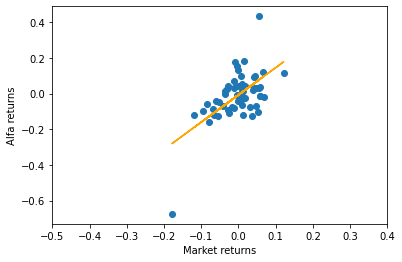

In [13]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

/home/mariana/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


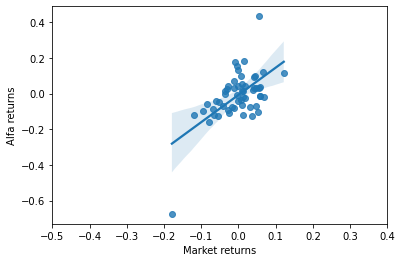

In [14]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

3. Run the market regression model. 

In [16]:
# Run the market regression mode
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.10
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.63e-06
Time:                        13:11:06   Log-Likelihood:                 43.901
No. Observations:                  55   AIC:                            -83.80
Df Residuals:                      53   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.015     -0.501      0.6

In [17]:
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()
 
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.10
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.63e-06
Time:                        13:11:36   Log-Likelihood:                 43.901
No. Observations:                  55   AIC:                            -83.80
Df Residuals:                      53   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0075      0.015     -0.501      0.6

In [18]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00750562,  1.52737599])


4. Write down the regression equation

The regression equation is: E[ALFAret]= -0.007505613796745412 + 1.5273759901245094*MXXret.

5. Interpret the beta coefficients and their corresponding t and p values, and their 95% confidence intervals

Note that the regression function in Python automatically performs hypothesis testing for both coefficients, and , where the null hypotheses are that the coefficients are equal to zero.